In [35]:
import nibabel as nib
import skimage.io as io
import matplotlib.pyplot as plt
from dipy.viz import regtools
from dipy.align.streamlinear import StreamlineLinearRegistration
from dipy.tracking.streamline import set_number_of_points
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)

Text(0.5, 1, 'img_wmseg')

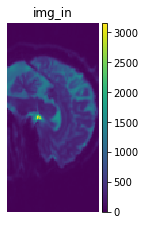

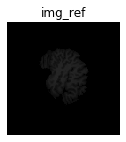

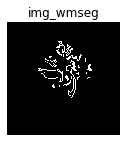

In [30]:
img_in = nib.load('d:/Downloads/neurodatadesign/ndmg_outputs/dwi/preproc/nodif_B0.nii.gz')
fig = plt.figure()
a = fig.add_subplot(1, 3, 1)
img_in_arr = img_in.get_data()
io.imshow(img_in_arr[72])
a.axis('off')
a.set_title('img_in')

fig = plt.figure()
a = fig.add_subplot(1, 3, 2)
img_ref = nib.load('d:/Downloads/neurodatadesign/ndmg_outputs/anat/preproc/t1w_brain_nores.nii.gz')
img_ref_arr = img_ref.get_data()
io.imshow(img_ref_arr[72])
a.axis('off')
a.set_title('img_ref')

fig = plt.figure()
a = fig.add_subplot(1, 3, 3)
img_wmseg = nib.load('d:/Downloads/neurodatadesign/ndmg_outputs/tmp/reg_a/t1w_wm_edge.nii.gz')
img_wmseg_arr = img_wmseg.get_data()
io.imshow(img_wmseg_arr[46])
a.axis('off')
a.set_title('img_wmseg')

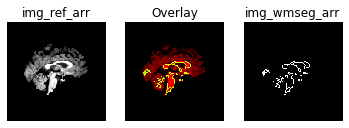

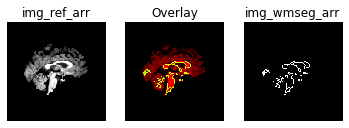

In [32]:
regtools.overlay_slices(img_ref_arr, img_wmseg_arr, None, 0,
                        "img_ref_arr", "img_wmseg_arr")

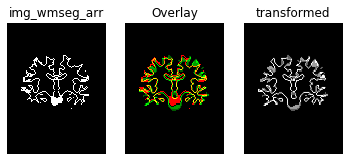

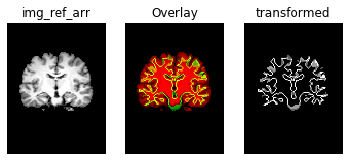

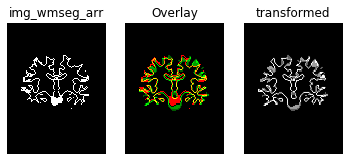

In [40]:
c_of_mass = transform_centers_of_mass(img_ref_arr, img_ref.affine,
                                      img_wmseg_arr, img_wmseg.affine)
transformed = c_of_mass.transform(img_wmseg_arr)
regtools.overlay_slices(img_ref_arr, transformed, None, 1,
                        "img_ref_arr", "transformed")
regtools.overlay_slices(img_wmseg_arr, transformed, None, 1,
                        "img_wmseg_arr", "transformed")

In [ ]:
nbins = 32
sampling_prop = None
metric = MutualInformationMetric(nbins, sampling_prop)
level_iters = [10000, 1000, 100]
sigmas = [3.0, 1.0, 0.0]
factors = [4, 2, 1]
affreg = AffineRegistration(metric=metric,
                            level_iters=level_iters,
                            sigmas=sigmas,
                            factors=factors)

In [47]:
from dipy.data import two_cingulum_bundles
cb_subj1, cb_subj2 = two_cingulum_bundles()
# print(type(cb_subj1))
# print(cb_subj1)
print(type(img_ref_arr))

<class 'list'>
[array([[  3.4266133,  55.70445  ,  22.012909 ],
       [  7.693566 ,  55.754036 ,  20.653088 ],
       [  9.500576 ,  54.669178 ,  16.991041 ],
       [  8.539969 ,  51.8611   ,  13.711982 ],
       [  6.190239 ,  47.379944 ,  12.379767 ],
       [  5.0686984,  41.60299  ,  11.977746 ],
       [  5.2000046,  35.417625 ,  11.672944 ],
       [  5.7197537,  29.30468  ,  10.8014   ],
       [  6.7446823,  23.24284  ,   9.993346 ],
       [  8.115209 ,  17.223848 ,   9.351261 ],
       [  9.52421  ,  11.2799   ,   8.366842 ],
       [ 11.331549 ,   5.634051 ,   6.59174  ],
       [ 13.356968 ,   0.3709848,   4.1337953],
       [ 13.511808 ,  -5.281076 ,   3.531529 ],
       [ 10.336846 , -10.294027 ,   4.914276 ],
       [  6.287573 , -14.696583 ,   5.808603 ],
       [  4.272831 , -20.471832 ,   5.8139653],
       [  2.2492354, -25.68159  ,   3.746884 ]], dtype=float32), array([[ 1.8772081, -6.2892356, 18.419607 ],
       [ 6.864729 , -6.506236 , 18.372213 ],
       [11.13

In [42]:
img_ref_arr = set_number_of_points(img_ref_arr, 20)
transformed = set_number_of_points(transformed, 20)

ValueError: Buffer has wrong number of dimensions (expected 2, got 3)